# Fit-Vorlesung EDV für Physikerinnen und Pkysiker 22.01.2020

## Einfaches Anpassen - Mittelwert und Standardabweichung

Nehmen wir ein Beispiel mit Daten aus einer Datei, wobei wir hier Messwerte mit Fehlern haben. Nehmen wir an, die Messwerte wurden in gleichen Zeitabständen genommen.

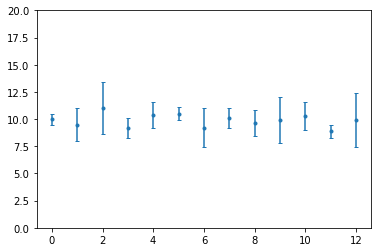

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('data/data.txt')

x_data = data[:,0]
y_data = data[:,1]
err_data = data[:,2]

plt.ylim(0,20)
plt.errorbar(x_data, y_data, yerr=err_data, capsize=2, fmt='.');

Die Daten suggerieren, dass bei jeder Messung immer der gleiche physikalische Zustand gemessen wurde. In so einem Fall ist die einfachste Anpassung, die Berechnung des Mittelwerts und die Standardabweichung:

$$ \bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i \textrm{  und  } \sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (y_i-\bar{y})^2 $$

Für diese Daten kann man das leicht mit `numpy` berechnen:

Mittelwert ist: 9.884615384615385 +/- 0.5722373819506861


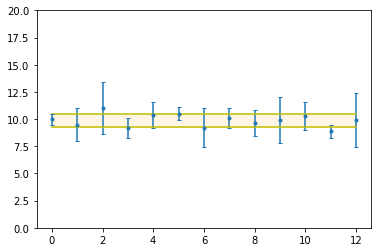

In [2]:
mean = y_data.mean()   # Mittelwert
stddev = y_data.std()  # Standardabweichung

print('Mittelwert ist: {} +/- {}'.format(mean, stddev))

# define the fill area
a_p = np.array([mean+stddev] * x_data.shape[0])
a_m = np.array([mean-stddev] * x_data.shape[0])

plt.plot(x_data, a_p, 'y')
plt.plot(x_data, a_m, 'y')
plt.fill_between(x_data, a_p, a_m, color="orange",alpha=0.1)

plt.ylim(0,20)
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], capsize=2, fmt='.');

Man sieht, dass in diesem Beispiel alle Datenpunkte mit ihren Fehlern im dem Bereich des Mittelwertes und der Standardabweichung liegen. Somit sollte der Mittelwert die Daten repräsentieren.

## Geradenanpassung - Teil 1

Als nächstes Beispiel nehmen wir Daten mit Fehlern, wobei die einzelnen Datenpunkte offensichtlich auf einer Gerade liegen sollen. 

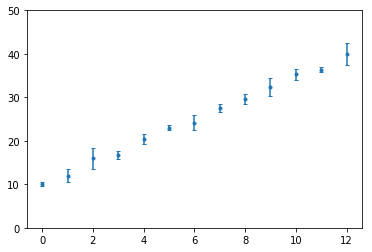

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('data/data.txt')

x_data = data[:,0]
y_data = data[:,1] + x_data*2.5   # Daten auf eine Gerade verlegen
err_data = data[:,2]

plt.ylim(0, 50)
plt.errorbar(x_data, y_data, yerr=err_data, capsize=2, fmt='.');

Graphisch ohne Computer kann man leicht eine Ausgleichsgerade inklusive einer Geraden mit minimaler und maximaler Steigung für die Fehler berechnen.

Mit dem Computer ist es ein wenig aufwendiger. Schauen wir uns zunächst folgende Funktion an:

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def line(x, a, b):
    return x*a + b    

Mit `line` wird eine Geradenfunktion definiert, die als Parameter die Steigung `a` und den Offset `b` hat:
$$y = a x + b$$

Sie können diese Funktion, um Datenpunkte passend zu den vorgegebenen `x`-Werten zu erzeugen (Genaueres zu dieser Funktion kommt später):

In [ ]:
plt.ylim(0, 50)
plt.errorbar(x_data, y_data, yerr=err_data, capsize=2, fmt='.');
plt.plot(x_data, line(x_data, 1, 5), label=r'a=1 b=5')
plt.plot(x_data, line(x_data, 2, 12), label=r'a=2 b=12')
plt.legend(loc='upper left')

In dem obigen Beispiel werden zwei Beispiel-Geraden erzeugt, eine mit der Steigung 1 und dem Offset 5 (rot) und eine mit der Steigung 2 und dem Offset 12 (grün). Die grüne Gerade sieht schon in etwa passend zu den Datenpunkten aus dem Datensatz aus.  

Man kann an dieser Stelle rumprobieren, bis man den richtigen Parametersatz für eine Gerade gefunden hat, mit der alle Datenpunkte innerhalb der Fehler auf der Geraden liegen, aber dafür hat man ja den Computer, der das für einen machen soll!

## Methode der kleinsten Quadrate

Wie oben gezeigt, kann man sich mit der Funktion `line` Beispiel-Geraden erzeugen. Wie kann man herausbekommen, ob diese Gerade mit den Datenpunkten übereinstimmt? 

Die Antwort ist einfach, man bestimmt den statistischen `Abstand` zwischen der Gerade und den Datenpunkten. Dazu wird ähnlich der Standardabweichung für jeden einzelnen Wert das Quadrat der Differenz zwischen Datenpunkt und entsprechendem Geradenpunkt (Residual) berechnet und aufsummiert:

$$ S = \sum_{i=1}^n (y_i-\textrm{line}(x_i,a,b))^2 $$ 

Für die beiden Geraden sieht es dann so aus: 

In [ ]:
red_S = ((y_data - line(x_data, 1, 5))**2).sum()
green_S = ((y_data - line(x_data, 2, 12))**2).sum()

print('rote Gerade : S={}'.format(red_S))
print('grüne Gerade: S={}'.format(green_S))

Für jedes Paar von Parametern `a` und `b` kann man dann einen Abstand zu den Datenpunkten berechnen. Wie man an dem obigen Beispiel sehen kann, ist der Abstand der grünen Gerade kleiner als der Abstand der roten Geraden, was dem Betrachten entspricht, die grüne Gerade passt besser als die rote!

Wenn es gelingen würde, ein Parameterpaar zu finden, bei der die Gerade exakt auf allen Datenpunkten liegen würde, ist der Abstand `0`. Dieses ist bei reellen Daten in der Regel unmöglich, allerdings wäre ein Ziel, den Abstand so weit zu verringern, dass die Gerade den Datenpunkten so nah wie möglich kommt! 

Diese Methode nennt man **Methode der kleinsten Qudratate** (Least square fit) und wurde von Carl Friedrich Gauß 1795 entdeckt und am Anfang für die Berechnung und Vorhersage von Positionen astronomischer Körper benutzt.

Da in der Regel die Datenwerte auch Fehler enthalten, benutzt man zur Minimierung die $\chi^2$-Funktion:

$$ \chi^2 = \sum_{i=1}^n (\frac{y_i-\textrm{m}(x_i,a,b,...)}{\Delta y_i})^2 $$ 


Die Umsetzung dieses Minimierungsproblems ist nun die eigentliche Arbeit.

## Geradenanpassung - Teil 2

Für die Geradenanpassung in dem obigen Beispiel, wo es hauptsächlich um die Steigung der Geraden geht, der Offset `b` lässt sich durch den Mittelwert vom Anfang ersetzen, kann man den Parameter `a` sicher leicht mit einer Intervallschachtelung bestimmen. Sonst gibt es für Geradenanpassungen auch fixe Berechnungsgrundlagen, auf die wir hier aber nicht weiter eingehen wollen.

In Python liefert die Unterbibliothek `optimize` von `scipy` ein Tool, welches man für viele Fit-Aufgaben verwenden kann. Instbesondere können Sie diese Funktion innerhalb des Praktikums gut verwenden. Bevor wir auf die Funktion im Detail eingehen, hier ein Beispiel zur Lösung der Geradenanpassung:

In [ ]:
import scipy.optimize as so

popt, pcov = so.curve_fit(line, x_data, y_data)
perr = np.sqrt(np.diag(pcov))

plt.ylim(0, 50)
plt.errorbar(x_data, y_data, yerr=err_data, capsize=2, fmt='.');
plt.plot(x_data, line(x_data, *popt))

print('Die Geradenparameter sind:')
print(' a = {} +/- {}'.format(popt[0], perr[0]))
print(' b = {} +/- {}'.format(popt[1], perr[1]))

## Aufbau von `curve_fit`

Als allererstes müssen wir nochmal auf die Funktion eingehen, die bei dem Fitten benutzt wird (im obigen Beispiel `line`). 

Der generelle Aufbau ist:

```Python

def fit_func(x, a, b, c, ...): 
    # do something
    return  results      
```

Wichtig ist `x` ist ein `numpy`-Array, während die Parameter (mind. einer) `a`, `b`, ... vom Typ Fliesskommazahlen sind. Der zurückzugebenene Wert sollen dann die Datenwerte jeweils zu einem `x`-Wert sein, ist also auch ein `numpy`-Array! Man soll die Funktion vielleicht auch so definieren, dass `x` auch eine Fliesskommazahl sein kann, aber wichtig ist die Verarbeitung von Arrays. Die Anzahl der Parameter ist beliebig, es muss nur mind. einer vorhanden sein; `curve_fit` nutzt automatisch die vorgegebenen Parameter!

Aufgerufen wird `curve_fit` immer nach dem gleichen Schema:

```Python
popt, pcov = curve_fit(fit_func, x_data, y_data, parameters)   # parameters are optional
```

Die einzelnen Parameter werden wir anhand der folgenden Beispiele sehen.

Als Rückgabewerte gibt `curve_fit` immer Werte zurück. `popt` enthält in einem Array die Werte der Parameter, die für den besten Fit berechnet wurden. `pcov` liefert ein 2d-Array zurück, welches die Kovarianzmatrix zu den Parametern enthält. Aus dieser Kovarianzmatrix lassen sich die Fehler der Parameter berechnen, die als Varianzen in der Diagonale stehen. Wenn Sie den folgende Anweisung nutzen:
```Python
perr = np.sqrt(np.diag(pcov))
```
haben Sie die Fehler in einem Array `perr` parallel zu dem Parameter-Array `popt`.

## Weitere Beispiele

### Fitten mit Fehlern

In vielen Fällen gibt es zu den Datenwerten Fehler (y-Fehler), die beim Fit berücksichtigt werden sollen. Dafür kennt `curve_fit` den optionalen Parameter `sigma`. Man kann einen allg. Fehler für alle Datenwerte gleichzeitig als Fliesskommazahl oder als `numpy`-Array individuell zu jedem Wert angeben:

In [ ]:
import scipy.optimize as so

popt, pcov = so.curve_fit(line, x_data, y_data, sigma=err_data, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

plt.ylim(0, 50)
plt.errorbar(x_data, y_data, yerr=err_data, capsize=2, fmt='.');
plt.plot(x_data, line(x_data, *popt))

print('Die Geradenparameter sind:')
print(' a = {} +/- {}'.format(popt[0], perr[0]))
print(' b = {} +/- {}'.format(popt[1], perr[1]))

### Komplexe Fit-Funktionen

In [ ]:
x_data2 = np.linspace(0,10,100)
y_data2 = np.array([56.57842148, 46.69628716, 64.36335875, 66.05682437, 50.67604033,
       59.59393665, 79.96709194, 51.74475279, 58.49899846, 78.37223385,
       60.93049697, 68.76067376, 72.48051415, 67.76931413, 66.32046448,
       63.65415124, 60.82917205, 69.60869046, 67.0324375 , 67.08117535,
       70.0221583 , 73.5156974 , 59.91138655, 60.59673441, 62.73070407,
       35.22291736, 64.96477555, 60.27995319, 59.16792984, 61.87355199,
       59.20076342, 48.57517903, 58.52150211, 61.53236997, 49.34540836,
       58.09374024, 65.63202058, 65.18363671, 45.97147553, 47.82920638,
       51.92618175, 64.14402461, 50.31612441, 43.42655594, 46.426103  ,
       47.97867832, 51.91997291, 45.04933792, 56.42894693, 56.97875048,
       43.38390498, 51.32937679, 53.1078288 , 65.65662128, 69.09044387,
       60.96781083, 56.27089128, 59.7227989 , 71.33123016, 79.15540502,
       80.28638701, 77.37616305, 62.51479324, 52.54305533, 69.13030091,
       65.20653505, 61.57974367, 68.02728146, 53.44865366, 64.91534085,
       56.78049545, 51.0632137 , 43.17020558, 44.60063765, 44.31069151,
       36.56393426, 34.79336679, 34.2208498 , 34.69099359, 39.78566679,
       43.00383249, 25.6806266 , 29.38471853, 14.85559358, 21.03337288,
       21.89617948, 26.49661895, 20.96088414, 21.47109652, 23.72291423,
       23.03678842, 24.2520224 , 31.6661944 , 21.29656681, 22.20600606,
       19.32856879, 19.31803664, 16.74451803, 27.93432488, 30.46846739])
err_data2 = np.sqrt(np.abs(y_data2))

plt.errorbar(x_data2, y_data2, yerr=err_data2, capsize=2);

Eine Funktion an diese Daten anzufitten ist ohne Vorwissen etwas schwierig. Aus der Herkunft der Daten wissen wir, dass wir ungefähr bei `x` = 6 einen Gausspeak haben und dass dieser auf einem Untergrund liegt, welcher durch eine Gerade definiert werden kann.

Es ergibt sich dadurch eine komplexe Fit-Funktion:

In [ ]:
def fit_func2(x, a, x0, sigma, c, d):
    gaussfkt = a*np.exp(-(x-x0)**2/(2*sigma**2))
    geradefkt = c * x + d
    return gaussfkt + geradefkt

Es wird eeine Gaussfunktion um den Mittelpunkt `x0` mit einer Breite `sigma` und einer Höhe `a` definiert. Dazu wird eine Gerade addiert, die eine Steigung `c` und einen Offset `d` hat.

In [ ]:
popt, pcov = so.curve_fit(fit_func2, x_data2, y_data2, sigma=err_data2, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))
print(popt)
print(perr)

plt.errorbar(x_data2, y_data2, yerr=err_data2, capsize=2);
plt.plot(x_data2, fit_func2(x_data2, *popt));

Der Fit sieht schon ganz gut aus, allerdings sieht man, dass der Untergrund durch die Werte an der linken und rechten Seite flacher wird, als es eigentlich sein sollte. Man kann beim Fitten natürlich auch die Daten-Arrays einschränken. z.B. sollen beim Fit nur die Werte `x > 1` und `x < 10` verwendet werden:

In [ ]:
arg = (x_data2 > 1) & (x_data2 < 9.5)    # select only the inner part

popt1, pcov1 = so.curve_fit(fit_func2, x_data2[arg], y_data2[arg], 
                        sigma=err_data2[arg], absolute_sigma=True)
perr1 = np.sqrt(np.diag(pcov))
print(popt1)
print(perr1)

plt.errorbar(x_data2, y_data2, yerr=err_data2, capsize=2);
plt.plot(x_data2, fit_func2(x_data2, *popt));

An dieser Stelle sieht man, dass Fitten nicht leicht ist. Der Gauss-Peak, der vorher noch richtig gefittet wurde, ist nun an die rechte Seite gerutscht. An diesem Punkt kann man die Vorgaben an den Fit durch Setzen von Anfangswerten in die richtige Richtung bewegen. `curve_fit` hat dazu den Parameter `p0`! 

**Aber Vorsicht, diese Methode funktioniert leider nicht immer! (und nicht automatisch!)**

In [ ]:
arg = (x_data2 > 1) & (x_data2 < 9.5)   # select only the inner part

initvals = [40,6,0.1,0,0]  # give some initial values for the parameters


popt2, pcov2 = so.curve_fit(fit_func2, x_data2[arg], y_data2[arg], 
                          p0=initvals, sigma=err_data2[arg], absolute_sigma=True)
perr2 = np.sqrt(np.diag(pcov2))
print(popt2)
print(perr2)

plt.errorbar(x_data2, y_data2, yerr=err_data2, capsize=2);
plt.plot(x_data2, fit_func2(x_data2, *popt))

So sieht der Fit ganz OK aus!

Es gibt noch eine weitere Möglichkeit, die Suche nach den optimalen Parametern einzugrenzen. `curve_fit` benutzt dafür den Parameter `bounds`, der für alle Parameter ein Array mit den Minimalwerten und ein Array mit den Maximalwerten als Liste mit 2 Elementen erwartet. Das Online-Tutorial hat dazu eine schönes Besipiel!

## Probleme mit dem Fitten

Schauen wir uns folgenden Plot und den Fit an:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import scipy.optimize as so

def fit_func3(x, a, b):
    return a * np.exp(x + b)

numpoints = 10 # the number of points we want to simulate
x = np.random.uniform(-2., 2., numpoints)
y = 0.2 * np.exp(x + 5) + np.random.normal(0., 10., numpoints)
plt.errorbar(x, y, yerr=10, fmt=".", capsize=2)

popt3, pcov3 = so.curve_fit(fit_func3, x, y,
                          sigma = np.ones(y.shape) * 10, absolute_sigma=True)
perr3 = np.sqrt(np.diag(pcov3))
x_fit = np.linspace(-2.0, 2.0, 20)
plt.plot(x_fit, fit_func3(x_fit, *(popt3)), 'r-');

Der Fit sieht OK aus, aber:

In [ ]:
print('a = {} +/- {}'.format(popt3[0], perr3[0]))
print('b = {} +/- {}'.format(popt3[1], perr3[1]))

Die Fehler zu den Parametern sind exorbitant hoch! In diesem Fall sollte man dem Fit nicht trauen! 

Grund für diesen fehlerhaften Fit ist, dass beide Parameter `a` und `b` voneinander abhängig sind. In so einem Fall kann es passieren, dass beide Werte sich gegenseitig `kompensieren`, was sich in dem Fehler manifestiert:
$$ f(x) = a \textrm{e}^{x + b} $$
lässt sich umschreiben in:
$$ f(x) = a \textrm{e}^b  \textrm{e}^x $$

Im Prinzip gibt es also nur einen Fit-Parameter! 

**Achten Sie immer darauf eine Fit-Funktion zu definieren, in denen die Parameter unabhängig voneinander sind!**

## Güte eines Fits durch $\chi^2$-Test

Wie wir oben in dem Beispiel des komplexen Fits gesehen haben, kann man den Fit durch Anpassen der Daten vorher oder durch Verändern des Fit-Parameters beeinflussen. Da die Fit-Methode bei `curve_fit` auf das Minimieren der $\chi^2$-Funktion basiert, ist diese Funktion ein optimaler Test, wie gut die Anpassung der gefitteten Funktion wirklich ist. Leider wird der Wert der $\chi^2$-Funktion leider nicht von `curve_fit` mitgeliefert, sondern muss separat berechnet werden. Zur Erinnerung:

$$ \chi^2 = \sum_{i=1}^n (\frac{y_i-\textrm{m}(x_i,a,b,...)}{\Delta y_i})^2 $$ 

In [ ]:
# for the first fit 
chisq = np.sum((y_data2 - fit_func2(x_data2, *popt) / err_data2)**2)
print(chisq)


# for the second fit
chisq = np.sum((y_data2 - fit_func2(x_data2, *popt2) / err_data2)**2)
print(chisq)

Wie man sieht, ist der zweite Fit-Ansatz, in dem der Werte-Bereich für den Untergrund eingeschränkt wurde, nach dem $\chi^2$-Test besser, was man auch anhand der optischen Betrachtung gesehen hat!

## Fitten mit Fehlern in  `x` und `y`-Richtung

Probleme tauchen auch auf, wenn man Fehler in $x$- und $y$-Richtung hat, wie folgendes Beispiel zeigt:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import scipy.optimize as so

def fit_line(x, a, b):
    return a * x + b

# create some fake data with errors in 'both' coordinates and plot them:
numpoints = 50 # the number of points we want to simulate
x = np.random.uniform(0., 100., numpoints)
y = x

# add errors in x and y
x = x + np.random.normal(0., 10., numpoints)
y = y + np.random.normal(0., 10., numpoints)

plt.errorbar(x, y, xerr=10, yerr=10, fmt=".")

# perform a fit as we did before (neglecting errors in x!):
popt, pcov = so.curve_fit(fit_line, x, y,
                          sigma = np.ones(y.shape) * 10, absolute_sigma=True)
plt.plot(x, fit_line(x, *(popt)), 'r-')
print(popt, np.sqrt(pcov[0,0]))

# now change the roles of x and y and fit again:
x1, y1 = y, x
popt, pcov = so.curve_fit(fit_line, x1, y1,
                          sigma = np.ones(y.shape) * 10, absolute_sigma=True)
plt.plot(x1, fit_line(x1, *(popt)), 'g-')
print(popt)
# Note that you do not get the 'inverse' of the first fit as you might expect!

Eine Möglichkeit ist eine *Orthogonal distance regression*, welches in dem folgenden [Skript](code/chi2FitXYErr.py) umgesetzt wird (Autor: Thomas Erben)

In [ ]:
!cat ./data/dataxy.txt
!cat ./data/dataxy_reversed.txt

In [ ]:
%run ./code/chi2FitXYErr.py -i ./data/dataxy.txt

In [ ]:
# The fit-result from the reversed data set also gives a 'inverse' line!
%run ./code/chi2FitXYErr.py -i ./data/dataxy_reversed.txt